# Bayesian Neural Networks (BNNs)

In this notebook a Bayesian Neural network is trained on the CFB data to take bridge parameter as input an predict the code compliance factors.

### Resources
Here you can find nice explanations: 

1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

The following source was used as a stating point for the implementation:

2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 

### Content
1. Data Import
2. Data Pre-processing
3. Setup and Train Model
4. Model Perfromance Evaluation
5. 1D Parameter Studies


In [1]:
#import necessary libraries
import json
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset




In [2]:
# # #Filtering
# from sampler import filter_eta_range
# df_filtered=filter_eta_range(df_1003, atLeastOne_critical=False, specific_eta_critical = True, specific_eta= 'eta_min_c', critical_range=[0.1, 3], all_relevant=False, relevant_range = [0, 10])
# df_filtered[['eta_min_c','eta_min_s','eta_min_shear']]
# 1003 info: they were filtered for eta_c in 0.1 to 3 bereich
#calculated 865
# 192 =0
# 763 not 0
# davon im gewollten bereich 0.1-3: 527
# davon in bereich 0.5 bis 1.5: 197
# davon 1.5 bis 3: 266
# davon kleiner als 0.5 (>0.1)

# eta='eta_min_c'
# plt.hist(df_filtered[eta], bins =100
#          )
# plt.title(eta)


In [77]:
# # Select features
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 's', 'beta', 'h_G'] # all 16 features
# # Select target(s)
# y_names=['eta_min_c', 'eta_min_s', 'eta_min_shear']

# df_1003_1=pd.read_csv('trainingData\\1003_CFB_xy_0_664.csv')
# df_1003_1=df_1003_1[x_names+y_names]
# df_1003_1

# df_1003_2=pd.read_csv('trainingData\\1003_CFB_xy_800_999.csv')
# df_1003_2=df_1003_2[x_names+y_names]
# df_1003_2

# df_save=pd.concat([df_1003_1, df_1003_2], ignore_index=True)
# df_save
# df_save.to_csv('trainingData\\1003_CFB_xy_wo_665_to_799.csv')
# df_save

In [32]:
# df_1003=pd.read_csv('trainingData\\RawData\\1003_CFB_xy.csv')
# # Select features
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 's', 'beta', 'h_G'] # all 16 features
# # Select target(s)
# y_names=['eta_min_c', 'eta_min_s', 'eta_min_shear']

# df_1003=df_1003[x_names+y_names]


# df_train=pd.read_csv('trainingData\\1001_1002_CFB_xy_train.csv')
# df_train=df_train[x_names+y_names]


# df_save=pd.concat([df_train, df_1003], ignore_index=True)
# df_save=df_save[df_save['eta_min_c']!=0]
# #df_save.to_csv('trainingData\\1001_1002_1003_CFB_xy_train.csv')
# df_save
# # df_1003[df_1003['eta_min_c']!=0]



,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,s,beta,h_G,eta_min_c,eta_min_s,eta_min_shear
0,13141.228498,2213.756813,1083.343076,1045.616126,3667.453137,20.859850,22.250309,16.988893,323.203110,24.506795,19.159559,450.285633,41.714626,0.581114,-9.129363,1088.795829,3.106939,0.999622,0.117046
1,12917.721117,8730.907270,804.618956,842.588269,3120.709780,12.249993,25.019382,14.522539,179.352254,22.428909,28.358732,166.341561,28.961077,0.776200,-26.677100,1357.462934,2.880366,1.046180,0.418814
2,12532.428821,17423.311792,683.825161,654.313330,3532.353784,12.559037,22.427204,13.322573,253.857384,14.118447,20.426064,318.260970,43.099495,0.658922,49.123484,778.723421,2.112034,0.998996,0.144753
3,13157.108155,17267.723656,916.427049,1210.181249,4913.791059,20.481922,13.547932,18.524053,249.428205,29.060088,17.538221,211.134689,28.318187,0.460717,-37.045757,774.703313,2.534408,0.999462,0.071867
4,10396.121719,11847.226208,375.648739,726.136768,4303.405483,20.733097,17.923049,25.467894,251.522492,17.699046,12.357417,274.153715,40.599664,0.121252,-16.406805,478.617154,0.657849,0.997154,0.022651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,7292.481726,2630.929558,500.384132,365.346225,2099.483844,22.511029,23.139504,22.873908,144.227288,11.349843,19.782584,346.978847,34.589178,0.835711,-27.874869,520.826358,2.171281,1.011887,0.433113
996,8094.059731,12028.432802,360.563532,683.659168,2651.087277,26.445904,11.030083,25.111461,261.108592,16.060830,26.952644,435.715078,49.261283,0.104358,45.371711,944.729841,1.787798,0.998492,0.117897
997,6867.661205,19716.650866,236.612677,1231.230380,4223.863628,14.351139,26.322388,19.703159,503.726652,20.077918,23.156073,437.503691,43.620750,0.652775,11.149412,769.333947,0.906973,0.999184,0.139870
998,10821.158745,2459.541545,505.002233,376.288504,4798.753440,29.130015,17.164455,24.657522,262.883424,21.006850,27.708275,82.557592,30.096884,0.450170,24.083232,1080.477264,1.615063,0.998288,0.068358


In [39]:
## Initialise Training study tracking dict
# initialise whole dict (only run once per study)
# only has to be run once when a new dict should be created
dict_name='TestingUncertantyStudy'
eval_dict={}

In [4]:
# import json

# # Load the two dictionaries from the JSON files
# with open('trainedModels\\Studie_1_Sophia.json') as f1, open('trainedModels\\Study_0_Antoine.json') as f2:
#     dict_Sophia = json.load(f1)
#     dict_Antoine = json.load(f2)

# # Combine the two dictionaries with updated key naming
# combined_dict = {}

# # Append '_S' to all keys from Sophia's study
# for key in dict_Sophia:
#     combined_dict[key + '_S'] = dict_Sophia[key]

# # Append '_A' to all keys from Antoine's study
# for key in dict_Antoine:
#     combined_dict[key + '_A'] = dict_Antoine[key]

# # Save the combined dictionary back to a JSON file if needed
# with open('trainedModels\\Combined_Study.json', 'w') as out_file:
#     json.dump(combined_dict, out_file, indent=4)

# # Optional print of the combined dictionary for review
# print(json.dumps(combined_dict, indent=4))

In [26]:
# load_evaluation dict

dict_name='TestingUncertantyStudy'
with open('trainedModels\\{}.json'.format(dict_name), 'r') as file:
    eval_dict = json.load(file)

In [27]:
# Initialize an empty list to hold the rows
rows = []

# Initialize an empty list to hold the column headers
columns = []

# Loop through the nested dictionary to build rows and columns
for key, subdict in eval_dict.items():
    row = {}
    for subkey, subsubdict in subdict.items():
        for subsubkey, value in subsubdict.items():
            column = (subkey, subsubkey)  # subkey and subsubkey as the column header
            row[column] = value
            if column not in columns:
                columns.append(column)  # Collect all unique columns
    rows.append((key, row))

# Create a DataFrame with the columns and rows, using the key as the index
df = pd.DataFrame([row for _, row in rows], index=[key for key, _ in rows])

# Set multi-level columns (subkey, subsubkey)
df.columns = pd.MultiIndex.from_tuples(columns)

# Display the DataFrame
df.to_excel("trainedModels/{}.xlsx".format(dict_name))

## 1.  Data Import 

Data is imported from the defined csv file to a pandas Data Frame.

In [28]:
####### load values #######

data_batch='1001_1002_1003'
train_df = pd.read_csv("trainingData/1001_1002_1003_CFB_xy_train.csv")
val_df = pd.read_csv("trainingData/1001_CFB_xy_validation.csv")
test_df = pd.read_csv("trainingData/1001_CFB_xy_test.csv")




In [29]:
train_df

,Unnamed: 0,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,s,beta,h_G,eta_min_c,eta_min_s,eta_min_shear
0,0,7316.767442,9858.693527,670.111910,296.960109,4578.954788,19.123075,23.414408,29.351365,437.575707,14.570059,20.392475,329.743669,26.216140,0.841518,-0.899371,763.083525,0.971350,0.999918,0.255641
1,1,4109.497290,10040.817949,216.866461,627.347199,2757.955442,25.327086,13.852833,28.445230,376.195192,22.440791,14.785867,156.659807,45.467104,0.357328,-17.686199,480.888478,2.988712,0.999900,0.478011
2,2,6481.214774,19642.425351,630.452453,808.700433,3575.074819,20.018548,15.454918,20.991629,235.775667,17.670412,20.880608,159.539665,31.003168,0.588936,47.460891,300.381370,14.358522,2.190585,2.100074
3,3,4983.830508,5045.232703,813.243489,281.592574,3852.597077,25.990575,13.490555,19.389877,179.930373,10.911357,23.134080,229.052153,49.855574,0.615093,0.413577,671.177680,3.832633,1.029085,0.178855
4,4,11350.654319,14992.112972,915.516826,996.779574,2742.346227,24.762013,25.404220,18.919854,404.169200,16.415385,12.309846,236.947986,39.761843,0.666640,13.325371,575.321280,7.989916,1.485492,0.950330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,6838,7292.481726,2630.929558,500.384132,365.346225,2099.483844,22.511029,23.139504,22.873908,144.227288,11.349843,19.782584,346.978847,34.589178,0.835711,-27.874869,520.826358,2.171281,1.011887,0.433113
6386,6840,8094.059731,12028.432802,360.563532,683.659168,2651.087277,26.445904,11.030083,25.111461,261.108592,16.060830,26.952644,435.715078,49.261283,0.104358,45.371711,944.729841,1.787798,0.998492,0.117897
6387,6841,6867.661205,19716.650866,236.612677,1231.230380,4223.863628,14.351139,26.322388,19.703159,503.726652,20.077918,23.156073,437.503691,43.620750,0.652775,11.149412,769.333947,0.906973,0.999184,0.139870
6388,6842,10821.158745,2459.541545,505.002233,376.288504,4798.753440,29.130015,17.164455,24.657522,262.883424,21.006850,27.708275,82.557592,30.096884,0.450170,24.083232,1080.477264,1.615063,0.998288,0.068358


In [30]:


# Select features
x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 's', 'beta', 'h_G'] # all 16 features
# Select target(s)
y_names=['eta_min_c']

x_train_df = train_df[x_names]
y_train_df = train_df[y_names]
x_val_df = val_df[x_names]
y_val_df = val_df[y_names]
x_test_df = test_df[x_names]
y_test_df = test_df[y_names]

# transfrom to numpy arrays
x_train_np = x_train_df.values
y_train_np = y_train_df.values
x_val_np = x_val_df.values
y_val_np = y_val_df.values
x_test_np = x_test_df.values
y_test_np = y_test_df.values

#Print shapes of the splitted data sets
print('Training Dataset: ',x_train_df.shape,y_train_df.shape )
print('Validation Dataset: ',x_val_df.shape, y_val_df.shape)
print('Test Dataset: ',x_test_df.shape,y_test_df.shape)



####### needed for the scaler #######
x_data_df = pd.concat([x_train_df, x_val_df, x_test_df], axis=0, ignore_index=True)
print('Total Dataset: ',x_data_df.shape )
total_data_set_size=x_data_df.shape[0]

Training Dataset:  (6390, 16) (6390, 1)
Validation Dataset:  (962, 16) (962, 1)
Test Dataset:  (1202, 16) (1202, 1)
Total Dataset:  (8554, 16)


## 2. Pre-process Data

Pre-Processing Steps
- select x and y columns (inputs and outputs)
- split data set in trianing and test set
- transform data to same range with MinMaxScaler
- transform scaled data to troch tensors

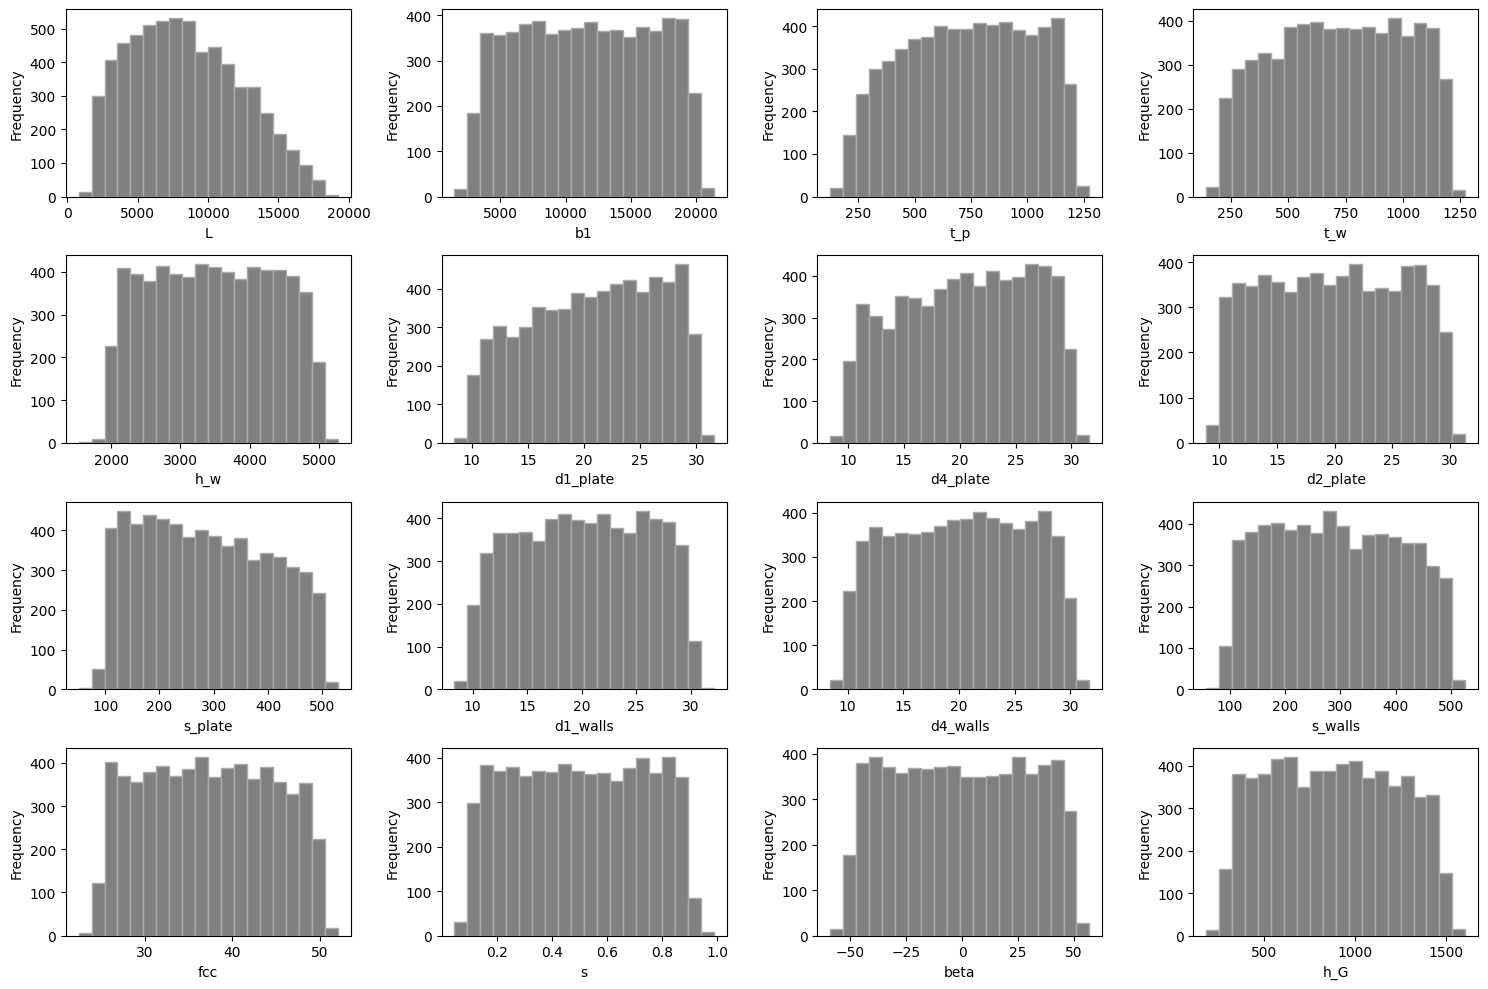

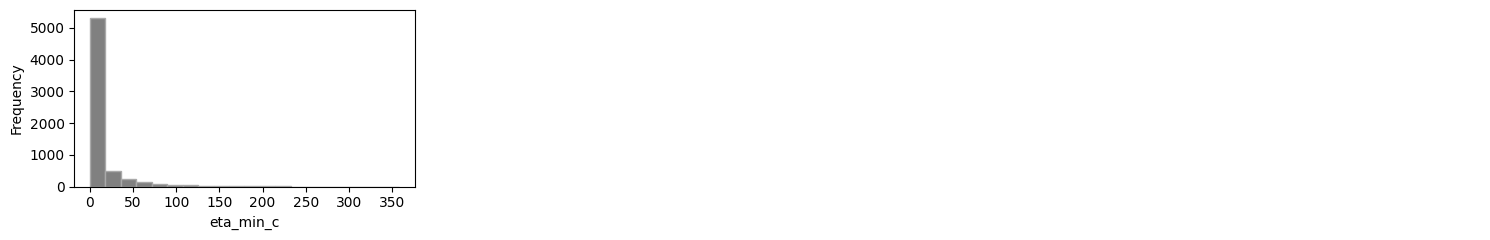

In [31]:
from plotting import hist_matrix
hist_matrix(x_train_df)
hist_matrix(y_train_df)

In [32]:
###### Scaling of data ######

# INPUT we scale to a range 0,1
# Initialize the MinMaxScaler and fit it on the training data
# Note: MinMaxScaler  scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
# Note: MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range
# Note: MinMaxScaler is sufficient as our data is uniformily distributed for the case when we have non-uniform distirbuted data (as sampled with )

#initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# fit scaler on total data set
scaler.fit(x_data_df)

# scale training data
x_train_scaled_np = scaler.transform(x_train_df)
x_train_scaled_df=pd.DataFrame(data=x_train_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_val_scaled_np = scaler.transform(x_val_df)
x_val_scaled_df=pd.DataFrame(data=x_val_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_test_scaled_np = scaler.transform(x_test_df)
x_test_scaled_df=pd.DataFrame(data=x_test_scaled_np, columns=scaler.get_feature_names_out())

#plot scaled data
x_train_scaled_df.describe()

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,s,beta,h_G
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,0.415495,0.506200,0.529696,0.516522,0.520477,0.538362,0.523458,0.495844,0.488939,0.499127,0.505126,0.502811,0.502508,0.484397,0.506549,0.492128
std,0.211955,0.249206,0.241755,0.247641,0.231385,0.246179,0.246705,0.257305,0.241203,0.240128,0.247971,0.243358,0.243815,0.248703,0.253079,0.240827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243588,0.291906,0.332464,0.314526,0.320308,0.336437,0.317310,0.273541,0.281327,0.295519,0.293597,0.294216,0.293180,0.269763,0.287704,0.284334
50%,0.397301,0.505760,0.537985,0.521730,0.518824,0.554046,0.534811,0.496987,0.474742,0.501949,0.511408,0.494456,0.498634,0.482650,0.502191,0.493189
75%,0.570802,0.723482,0.736202,0.728013,0.719774,0.752311,0.735745,0.722166,0.691609,0.707330,0.717054,0.708527,0.710452,0.701978,0.727111,0.693674
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Note instead of scaling the data here I inlcuded a mean squared log error loss in my training which has the same effect but no need for preprocessing and postprocing of training input and prediction output
# ###### Scaling of data ######

# # Y (Output) we scale with log(y)
# #m.log(y_train_np)

# # Applying y_trans=log_e(y+1) function/ transformation
# y_train_transf_np = np.log(y_train_np + 1) # log_e
# y_train_transf_df=pd.DataFrame(y_train_transf_np, columns=y_names)

# y_val_transf_np = np.log(y_val_np + 1) # log_e
# y_val_transf_df=pd.DataFrame(y_val_transf_np, columns=y_names)


# hist_matrix(y_train_transf_df)


# ##### convert to troch tensors ######

# # convert data to toch tensors (as needed format for BNN model)
# x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
# y_train_transf_tensor=torch.tensor(y_train_transf_df.values, dtype=torch.float32)

# x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
# y_val_transf_tensor=torch.tensor(y_val_transf_df.values, dtype=torch.float32)

In [34]:
##### convert to troch tensors ######

# convert data to toch tensors (as needed format for BNN model)
#training data
x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train_df.values, dtype=torch.float32)

#validation data
x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val_df.values, dtype=torch.float32)

#test data
x_test_scaled_tensor=torch.tensor(x_test_scaled_df.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test_df.values, dtype=torch.float32)


## 3. Setup and Train Model

- Define NN Architecture
- Define Losses
- Trianing Loop
- Plot loss developement during trianing
- save trained model

In [75]:
# # define NN architecture
# width=[16,20,20] # define manually #20,20,20
# layers=len(width)
# model = nn.Sequential(
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1),
#     nn.ReLU()
# )


# #initialize error tracking lists
# mse_list=[]
# mse_val_list=[]

# msle_list=[]
# msle_val_list=[]

# mean_mse_list=[]
# mean_mse_val_list=[]

# weighted_mse_list = []
# weighted_mse_val_list = []

# rmse_list=[]
# rmse_val_list=[]

# kl_list=[]
# kl_val_list=[]

# mape_list=[]
# mape_val_list=[]

# custom_loss_list = []
# custom_loss_val_list = []

# #initialize stocgastic error tracking lists
# rmse_stochastic_list=[]
# rmse_stochastic_val_list=[]

# weighted_mse_stochastic_list = []
# weighted_mse_stochastic_val_list = []




In [76]:
# ##### Losses ######

# #get loss functions
# # get kl loss
# kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
# # get mse loss
# mse_loss = nn.MSELoss()

# #import losses
# from MLmodel import  weighted_mse_loss, msle_loss, mape_loss,custom_loss





In [89]:
# ### Define other hyperparameters

# # define kl weight for weighing of kl_loss in total loss function
# # Note: depending which loss function are used different kl_weights should be chosen...msle is of a multiple magnitude smaller than the mse, so the kl_weight hast to also be adapter when we use that weight.
# # Note: with mse loss 0.01, with msle loss 0.0001 [0.001]
# #TO Test: [0.01,0.001, 0.0001]
# kl_weight = 0.001

# #get optimizer
# learning_rate=0.001
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # define epochs, and the training data, and the batch size
# epochs = 2
# batch_size = 100

# #loss function hyperparameters for weighted mse loss
# wMSE_loss_importance_range=(0.1,2)
# wMSE_loss_high_weight=1000


In [78]:
### save model training settings to eval_dict

#define model name:
# name rule: batch_filter_modeldepth_width_lossfunction_epochs_iteration
#!!!!
model_name='test'  # define manually

# # # initialize model dict
# # if model_name in eval_dict:
# #     raise ValueError(f"Error: The model name '{model_name}' already exists. Please use a different name to prevent overwriting.")
# # else:
# #     eval_dict[model_name] = {}
# eval_dict[model_name] = {}
# eval_dict[model_name]['model_settings']={}
# eval_dict[model_name]['training_set_performance']={}
# eval_dict[model_name]['validation_set_performance']={}

# # save model settings
# eval_dict[model_name]['model_settings']['batch']=data_batch
# eval_dict[model_name]['model_settings']['filtered']="without zero etas" 
# eval_dict[model_name]['model_settings']['total_data_size']=total_data_set_size
# eval_dict[model_name]['model_settings']['test_split']=0.2 
# eval_dict[model_name]['model_settings']['val_split']=0.2 
# eval_dict[model_name]['model_settings']['layers']=layers
# eval_dict[model_name]['model_settings']['width']=width
# #!!!!
# eval_dict[model_name]['model_settings']['loss']=['rmse', 'weighted mse'] # define manually
# eval_dict[model_name]['model_settings']['wMSE_loss_importance_range']=wMSE_loss_importance_range
# eval_dict[model_name]['model_settings']['wMSE_loss_high_weight']=wMSE_loss_high_weight


# eval_dict[model_name]['model_settings']['kl_weight']=kl_weight
# eval_dict[model_name]['model_settings']['learning_rate']=[0.001,0.001]#learning_rate
# eval_dict[model_name]['model_settings']['epochs']=[400,300]#epochs
# eval_dict[model_name]['model_settings']['batch_size']=batch_size

# #print
# eval_dict[model_name]

{'model_settings': {'batch': '1001_1002_1003',
  'filtered': 'without zero etas',
  'total_data_size': 8554,
  'test_split': 0.2,
  'val_split': 0.2,
  'layers': 3,
  'width': [16, 20, 20],
  'loss': ['rmse', 'weighted mse'],
  'wMSE_loss_importance_range': (0.1, 2),
  'wMSE_loss_high_weight': 1000,
  'kl_weight': 0.001,
  'learning_rate': [0.001, 0.001],
  'epochs': [400, 300],
  'batch_size': 32},
 'training_set_performance': {},
 'validation_set_performance': {}}

In [79]:
# eval_dict

{'test': {'model_settings': {'batch': '1001_1002_1003',
   'filtered': 'without zero etas',
   'total_data_size': 8554,
   'test_split': 0.2,
   'val_split': 0.2,
   'layers': 3,
   'width': [16, 20, 20],
   'loss': ['rmse', 'weighted mse'],
   'wMSE_loss_importance_range': (0.1, 2),
   'wMSE_loss_high_weight': 1000,
   'kl_weight': 0.001,
   'learning_rate': [0.001, 0.001],
   'epochs': [400, 300],
   'batch_size': 32},
  'training_set_performance': {},
  'validation_set_performance': {}}}

In [100]:
class wMSELoss(nn.Module):
    def __init__(self, importance_range=(0, 5), weight=10):
        """
        Initializes the weighted MSE loss function with a specified importance range and high weight.
        
        Parameters:
        importance_range (tuple): The range of target values that should receive higher weighting.
        high_weight (float): The weight to apply to errors within the importance range.
        """
        super(wMSELoss, self).__init__()
        self.importance_range = importance_range
        self.weight = weight

    def forward(self, predictions, targets):
        """
        Computes the weighted mean squared error loss.
        
        Parameters:
        predictions (Tensor): The predicted values from the model.
        targets (Tensor): The actual target values.
        
        Returns:
        Tensor: The computed weighted MSE loss.
        """
        # Calculate the basic MSE loss
        basic_mse = (predictions - targets) ** 2

        # Apply a weight to errors within the specified range
        weights = torch.ones_like(targets)
        weights[(targets >= self.importance_range[0]) & (targets <= self.importance_range[1])] = self.weight

        # Calculate the weighted MSE loss
        weighted_mse = basic_mse * weights
        return weighted_mse.mean()

In [ ]:
# define NN architecture
width=[16,20,20] # define manually #20,20,20
layers=len(width)
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1),
    nn.ReLU()
)


In [ ]:
# define epochs, and the training data, and the batch size
epochs = 4
batch_size = 32
n_forward_passes=1
learning_rate=0.001

kl_weight = 0.001
wMSE_loss_importance_range=(0.1,2)
wMSE_loss_weight=1000

#get loss functions
#data_loss_function = nn.MSELoss()
data_loss_function = wMSELoss(importance_range=wMSE_loss_importance_range, weight=wMSE_loss_weight)
kl_loss_function = bnn.BKLLoss(reduction='mean', last_layer_only=False)

In [103]:


# Shuffle is set to True to randomize the order of training data at each epoch
train_dataset = TensorDataset(x_train_scaled_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

epoch_loss=[]
epoch_kl_loss=[]
epoch_data_loss=[]

for epoch in range(epochs):
    model.train()

    batch_loss=[]
    batch_data_loss=[]
    batch_kl_loss=[]

    for x, y in train_loader:

        optimizer.zero_grad()

        # Perfrom multiple forward passes 
        y_pred_list=[]
        for _ in range(n_forward_passes):
            y_pred = model(x)
            y_pred_list.append(y_pred)
        #compute mean prediction
        y_pred_mean = torch.mean(torch.stack(y_pred_list), dim=0)


        data_loss = data_loss_function(y_pred_mean, y)
        kl = kl_loss_function(model)

       #print(data_loss)
        loss = data_loss + kl_weight*kl
        

        # Backward pass and optimization
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        batch_loss.append(loss.item())
        batch_data_loss.append(data_loss.item())
        batch_kl_loss.append(kl.item())

    epoch_loss.append(np.mean(batch_loss))
    epoch_data_loss.append(np.mean(batch_data_loss))
    epoch_kl_loss.append(np.mean(batch_kl_loss))
    

In [105]:
epoch_kl_loss

[37.53145658969879, 37.71829867362976, 37.864428997039795, 38.00847285985947]

In [ ]:
#saving the whole model
torch.save(model, 'trainedModels\\'+model_name+'.pth')

In [85]:
# ### trianing loop 
# from MLmodel import bnn_predict_with_uncertainty

# # Shuffle is set to True to randomize the order of training data at each epoch
# train_dataset = TensorDataset(x_train_scaled_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# # x = x_train_scaled_tensor
# # y = y_train_transf_tensor
# with_stochasticPrediction=True
# n_predictions=10

# #training loop
# for step in range(epochs):
    
#     model.train()

#     epoch_mse = []
#     epoch_msle = []
#     epoch_weighted_mse = []
#     epoch_rmse = []
#     epoch_kl = []
#     epoch_mape = []
#     epoch_custom = []

#     epoch_stochastic_rmse = []
#     epoch_stochastic_weighted_mse = []

#     for x, y in train_loader:
#         y_pred = model(x)

#         if with_stochasticPrediction:
#             #make stochastic prediction
#             y_pred_mean_np, y_pred_std_np, y_pred_n_times=bnn_predict_with_uncertainty(model, x, n=n_predictions)
#             y_pred_mean_tensor=torch.tensor(y_pred_mean_np, dtype=torch.float32)
#             #calculate metrics and track
#             mean_mse = mse_loss(y_pred_mean_tensor, y)
#             mean_rmse = torch.sqrt(mean_mse)
#             epoch_stochastic_rmse.append(mean_rmse.item())

#             mean_weighted_mse = weighted_mse_loss(y_pred_mean_tensor, y, importance_range=wMSE_loss_importance_range, high_weight=wMSE_loss_high_weight)
#             epoch_stochastic_weighted_mse.append(mean_weighted_mse.item())


            
#         #standard mse, rmse loss
#         mse = mse_loss(y_pred, y)
#         epoch_mse.append(mse.item())
#         # mse_list.append(mse.item())
#         rmse = torch.sqrt(mse)
#         epoch_rmse.append(rmse.item())

#         #msle loss
#         msle = msle_loss(y_pred, y,base='10')
#         epoch_msle.append(msle.item())
#         # msle_list.append(msle.item())

#         # weighted MSE loss
#         weighted_mse = weighted_mse_loss(y_pred, y, importance_range=wMSE_loss_importance_range, high_weight=wMSE_loss_high_weight)
#         epoch_weighted_mse.append(weighted_mse.item())
#         # custom_mse_list.append(custom_mse.item())

#         # mape
#         mape= mape_loss(y_pred, y)
#         epoch_mape.append(mape.item())


#         # # Custom loss
#         custom = custom_loss(y_pred, y, threshold=0.5, alpha=1, beta=1)
#         epoch_custom.append(custom.item())

#         #kl_divergence loss
#         kl = kl_loss(model)
#         epoch_kl.append(kl.item())
#         # kl_list.append(kl.item())

#         # Add individual losses weighted to single loss
#         cost_rmse = rmse + kl_weight*kl
#         cost_log=msle + kl_weight*kl
#         cost_weigthed_mse= weighted_mse + kl_weight*kl
#         cost_mape = mape + kl_weight*kl
#         cost_custom=custom + kl_weight*kl

#         #add stochastic loss functions
#         if with_stochasticPrediction:
#             cost_stochastic_rmse = mean_rmse + kl_weight*kl
#             cost_stochastic_weigthed_mse= mean_weighted_mse + kl_weight*kl
        
#         #print(cost_rmse)
#         print(rmse)
#         print(mean_rmse)

#         optimizer.zero_grad()
#         #!!!!
#         cost_rmse.backward() #Specify loss that should be used here
#         #!!!!
#         optimizer.step()

#     # Calculate mean losses for the epoch (on training data) and save in loss lists
#     mse_list.append(np.mean(epoch_mse))
#     rmse_list.append(np.mean(epoch_rmse))
#     msle_list.append(np.mean(epoch_msle))
#     weighted_mse_list.append(np.mean(epoch_weighted_mse))
#     kl_list.append(np.mean(epoch_kl))
#     mape_list.append(np.mean(epoch_mape))
#     custom_loss_list.append(np.mean(epoch_custom))

#     if with_stochasticPrediction:
#         rmse_stochastic_list.append(np.mean(epoch_stochastic_rmse))
#         weighted_mse_stochastic_list.append(np.mean(epoch_stochastic_weighted_mse))

#     # Calculate validation loss calculation and save in loss tracking lists
#     model.eval()
#     with torch.no_grad():
#         y_val_pred = model(x_val_scaled_tensor)

#         #standard mse, rmse loss
#         mse_val = mse_loss(y_val_pred, y_val_tensor)
#         mse_val_list.append(mse_val.item())
#         rmse_val = torch.sqrt(mse_val)
#         rmse_val_list.append(rmse_val.item())

#         #msle los
#         msle_val = msle_loss(y_val_pred, y_val_tensor, base='10')
#         msle_val_list.append(msle_val.item())

#         # weighted MSE loss
#         weighted_mse_val = weighted_mse_loss(y_val_pred, y_val_tensor, importance_range=(0, 4), high_weight=10)
#         weighted_mse_val_list.append(weighted_mse_val.item())

#         # mape loss
#         mape_val = mape_loss(y_val_pred, y_val_tensor)
#         mape_val_list.append(mape_val.item())

#         # custom loss
#         custom_val = custom_loss(y_val_pred, y_val_tensor, threshold=0.5, alpha=1, beta=1)
#         custom_loss_val_list.append(custom_val.item())


#         #stochastic losses
#         if with_stochasticPrediction:
#             #make stochastic prediction
#             y_pred_mean_val_np, y_pred_std_val_np, y_pred_n_times_val=bnn_predict_with_uncertainty(model, x_val_scaled_tensor, n=n_predictions)
#             y_pred_mean_val_tensor=torch.tensor(y_pred_mean_val_np, dtype=torch.float32)

#             #calculate metrics and track
#             mean_mse_val = mse_loss(y_pred_mean_val_tensor, y_val_tensor)
#             mean_rmse_val = torch.sqrt(mean_mse_val)
#             rmse_stochastic_val_list.append(mean_rmse_val.item())

#             mean_weighted_mse_val = weighted_mse_loss(y_pred_mean_val_tensor, y_val_tensor, importance_range=wMSE_loss_importance_range, high_weight=wMSE_loss_high_weight)
#             weighted_mse_stochastic_val_list.append(mean_weighted_mse_val.item())

        

#     # verbalise
#     if step % 1 == 0: #50
#         #TODO instead of mse take last value from mse_list that includes the mean value of the epoch (here we take the mse of a single batch)
#         print(f'Step {step}, On Training Set: MSE: {mse_list[-1]:.2f}, MSLE: {msle_list[-1]:.2f}, KL: {kl_list[-1]:.2f}, RMSE: {rmse_list[-1]:.2f}, '
#                 f'Weighted MSE: {weighted_mse_list[-1]:.2f}, MAPE: {mape_list[-1]:.2f}, Custom Loss: {custom_loss_list[-1]:.2f}; '
#                 'On Validation Set:', f'Val MSE: {mse_val_list[-1]:.2f}, Val MSLE: {msle_val_list[-1]:.2f}, Val RMSE: {rmse_val_list[-1]:.2f}, '
#                 f'Val Weighted MSE: {weighted_mse_val_list[-1]:.2f}, Val MAPE: {mape_val_list[-1]:.2f}, Val Custom Loss: {custom_loss_val_list[-1]:.2f}')



    

# print('Training is finished. The final losses:') 
# #TODO instead of mse take last value from mse_list that includes the mean value of the epoch (here we take the mse of a single batch)
# print(f'Step {step}, On Training Set: MSE: {mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, '
#           f'Weighted MSE: {weighted_mse.item():.2f}, MAPE: {mape.item():.2f}, Custom Loss: {custom.item():.2f}, '
#           'On Validation Set:', f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Weighted MSE: {weighted_mse_val.item():.2f}, '
#           f'Val MAPE: {mape_val.item():.2f}, Val Custom Loss: {custom_val.item():.2f}')  
# if with_stochasticPrediction:
#     print(f'Step {step}, On Training Set: stochastic mean MSE: {mean_mse.item():.2f}, stochastic mean RMSE: {mean_rmse.item():.2f},'
#           f'stochastic mean Weighted MSE: {mean_weighted_mse.item():.2f}')



tensor(4.7793, grad_fn=<SqrtBackward0>)
tensor(5.0509)
tensor(6.9496, grad_fn=<SqrtBackward0>)
tensor(4.9353)
tensor(6.4492, grad_fn=<SqrtBackward0>)
tensor(6.0923)
tensor(11.3129, grad_fn=<SqrtBackward0>)
tensor(7.6740)
tensor(5.2184, grad_fn=<SqrtBackward0>)
tensor(3.9827)
tensor(10.6092, grad_fn=<SqrtBackward0>)
tensor(12.0309)
tensor(3.3924, grad_fn=<SqrtBackward0>)
tensor(3.0574)
tensor(6.4054, grad_fn=<SqrtBackward0>)
tensor(7.6634)
tensor(4.6246, grad_fn=<SqrtBackward0>)
tensor(4.5524)
tensor(12.2030, grad_fn=<SqrtBackward0>)
tensor(10.1632)
tensor(5.7707, grad_fn=<SqrtBackward0>)
tensor(4.9652)
tensor(8.4315, grad_fn=<SqrtBackward0>)
tensor(8.4720)
tensor(4.1728, grad_fn=<SqrtBackward0>)
tensor(7.1338)
tensor(7.6757, grad_fn=<SqrtBackward0>)
tensor(7.1885)
tensor(10.5538, grad_fn=<SqrtBackward0>)
tensor(10.7957)
tensor(11.7023, grad_fn=<SqrtBackward0>)
tensor(11.4547)
tensor(14.4154, grad_fn=<SqrtBackward0>)
tensor(12.1909)
tensor(10.4905, grad_fn=<SqrtBackward0>)
tensor(10.372

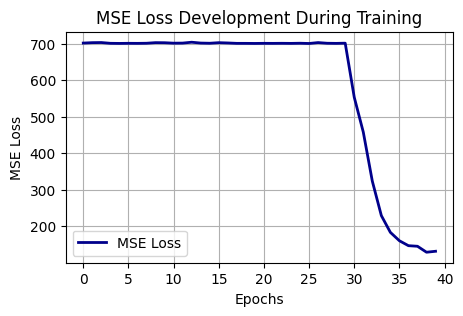

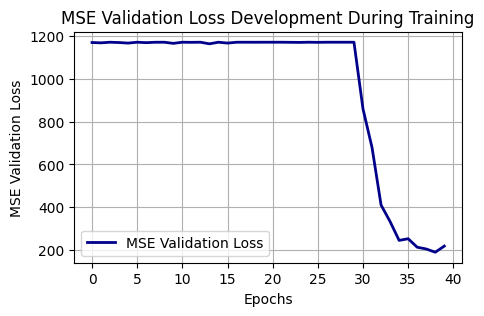

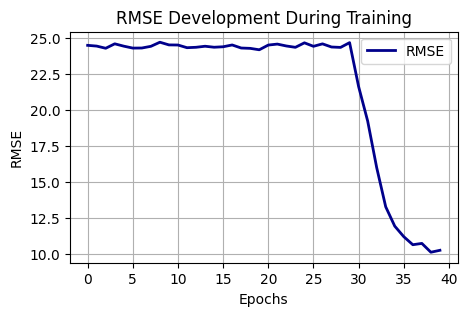

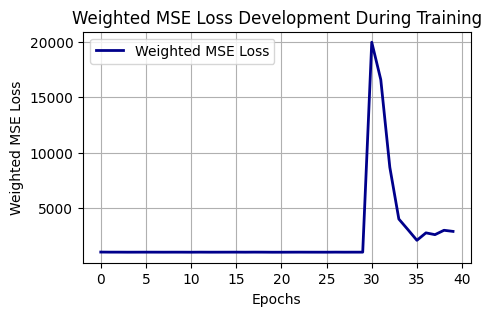

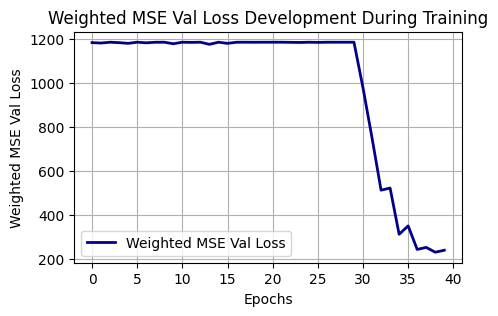

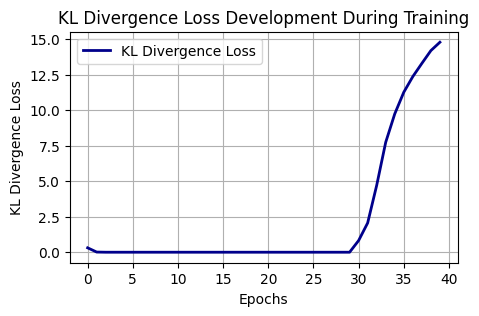

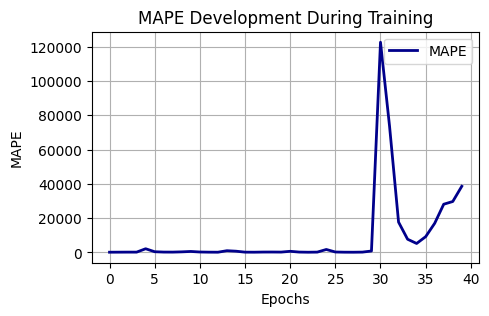

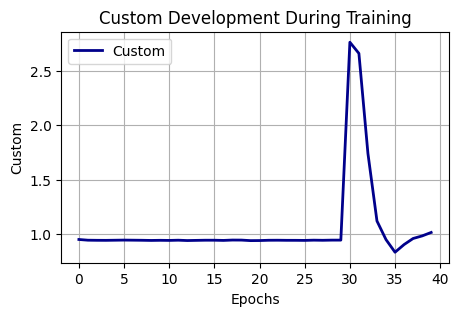

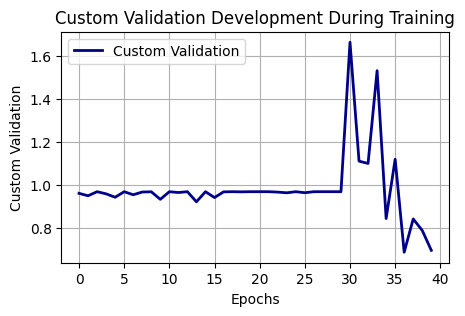

In [70]:
from plotting import plot_loss_development

loss_lists = [mse_list, mse_val_list, rmse_list, weighted_mse_list,weighted_mse_val_list, kl_list, mape_list, custom_loss_list,custom_loss_val_list]
# loss_lists = [mse_list, mean_mse_list, kl_list, rmse_list, weighted_mse_list]
loss_names = ['MSE Loss', 'MSE Validation Loss', 'RMSE', 'Weighted MSE Loss','Weighted MSE Val Loss', 'KL Divergence Loss', 'MAPE', 'Custom', 'Custom Validation']
# loss_names = ['MSE Loss', 'Mean MSE Loss', 'KL Divergence Loss', 'RMSE', 'Custom MSE Loss']

# Define a path to save the plots, if needed
save_path = 'trainedModels' # Example path, change it as needed

plot_loss_development(loss_lists, loss_names, save_path, color='darkblue', model_name=model_name, figsize=(5, 3))

In [9]:
####### save model #######
# define model name

#saving the whole model
torch.save(model, 'trainedModels\\'+model_name+'.pth')

#saving just the weights and biases
#torch.save(model.state_dict(), 'trainedModels\\'+name_training_run+'.pth')

NameError: name 'model' is not defined

## 4. Model evaluation
    


In [10]:
## load a model
model_name='1001_1002_1003_no0_3_20_rmse_weighted_mse_400_300_1'
model = torch.load('trainedModels\\'+model_name+'.pth')

model.eval() # sets the model to evaluation mode, which affects layers like dropout and batch normalization that behave differently during training and inference.
model

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1, bias=True)
  (5): ReLU()
)

In [11]:
from plotting import plot_true_vs_pred, single_para_strudy_perf
from MLmodel import bnn_predict_with_uncertainty, calculate_rmse, filter_values_within_range, calculate_mape, calculate_custom_loss, evaluate_model_performance

### On training data



In [16]:
# make predictions and caluclate mean 
##### make predictions ####3
# Define number of predictions
n_predictions = 1000
# Perfrom multiple predictions on data --> get mean and std for each data point
y_train_mean_pred_np, y_train_std_pred_np, y_train_pred_n_times = bnn_predict_with_uncertainty(model, x_train_scaled_tensor, n=n_predictions, log_transform_back=False)

In [17]:
sub_dict_name='training_set_performance'
eval_dict=evaluate_model_performance(y_true=y_train_np, y_pred=y_train_mean_pred_np,
                                      dict_name=sub_dict_name, model_name=model_name, eval_dict=eval_dict)

NameError: name 'eval_dict' is not defined

c:\Users\kuhnso\Documents\GitHub\StructuralEvaluationOfCFB\_workingFolder\MLmodel.py:342: RuntimeWarning: invalid value encountered in multiply
  [meanPred - z * std, meanPred + z * std]


0.3770579029733959 3.7705790297339594 3.7705790297339594


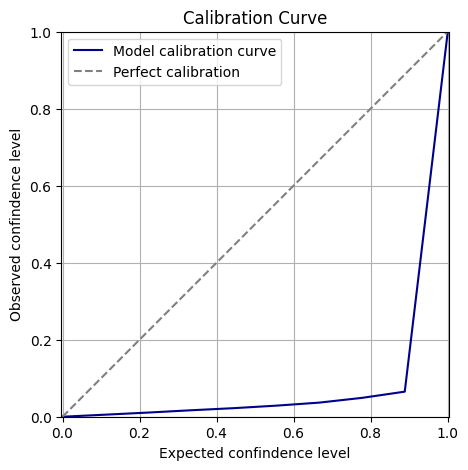

In [19]:
from MLmodel import evaluate_confidence_levels, calc_uncertainty_callibaration_metrics, plot_uncertainty_callibaration_curve

exp_conf, obs_conf= evaluate_confidence_levels(y_train_np, y_train_mean_pred_np, 
                                               y_train_std_pred_np, 
                                               n_confidence_levels=10)

ece, tce, bias =calc_uncertainty_callibaration_metrics(exp_conf, obs_conf,verbalise=True)

plot_uncertainty_callibaration_curve(exp_conf, obs_conf )

In [ ]:
# safe to dict
eval_dict[model_name][sub_dict_name]['ECE']=ece
eval_dict[model_name][sub_dict_name]['TCE']=tce
eval_dict[model_name][sub_dict_name]['CB']=bias

In [37]:
#print perfromances on training set
eval_dict[model_name][sub_dict_name]

{'rmse_all': 3.133574687838182,
 'mape_all': 6432338.886418166,
 'rmse_crit1': 0.31385954296456703,
 'mape_crit1': 28.674965322935396,
 'rmse_crit2': 0.9442026158221192,
 'mape_crit2': 33.97365001001918,
 'rmse_crit3': 2.633875089158949,
 'mape_crit3': 40.895922958323354,
 'rmse_crit4': 5.13858769242767,
 'mape_crit4': 14.739574391011622,
 'custom': 0.3630583508083019,
 'ECE': 0.4581010582799226,
 'TCE': 45.81010582799226,
 'CB': 45.80891339991058}

### on validation set

In [21]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_val_mean_pred_np, y_val_std_pred_np, y_val_pred_n_times = bnn_predict_with_uncertainty(model, x_val_scaled_tensor, n=n_predictions,log_transform_back=False)


In [39]:
sub_dict_name='validation_set_performance'
eval_dict=evaluate_model_performance(y_true=y_val_np, y_pred=y_val_mean_pred_np,
                                      dict_name=sub_dict_name, model_name=model_name, eval_dict=eval_dict)

c:\Users\kuhnso\Documents\GitHub\StructuralEvaluationOfCFB\_workingFolder\MLmodel.py:342: RuntimeWarning: invalid value encountered in multiply
  [meanPred - z * std, meanPred + z * std]


Expected Calibration Error (ECE): 0.465914760914761
Total Calibration Error (TCE): 46.591476091476096
Calibration Bias: 46.591476091476096
0.465914760914761 46.591476091476096 46.591476091476096


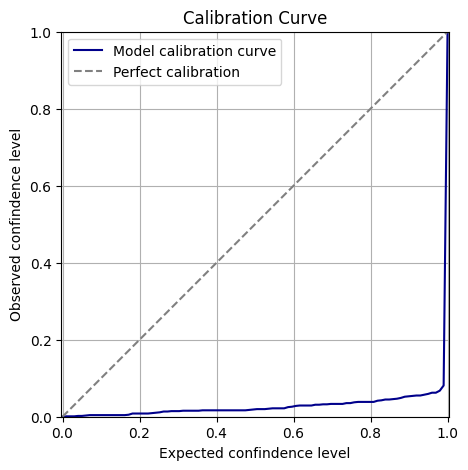

In [25]:
from MLmodel import evaluate_confidence_levels, calc_uncertainty_callibaration_metrics, plot_uncertainty_callibaration_curve

exp_conf, obs_conf= evaluate_confidence_levels(y_val_np, y_val_mean_pred_np, 
                                               y_val_std_pred_np, 
                                               n_confidence_levels=100)

ece, tce, bias =calc_uncertainty_callibaration_metrics(exp_conf, obs_conf, verbalise=True)
plot_uncertainty_callibaration_curve(exp_conf, obs_conf )

In [ ]:
# safe to dict
eval_dict[model_name][sub_dict_name]['ECE']=ece
eval_dict[model_name][sub_dict_name]['TCE']=tce
eval_dict[model_name][sub_dict_name]['CB']=bias

In [41]:
#print perfromances on validation set
eval_dict[model_name][sub_dict_name]

{'rmse_all': 5.525885939692185,
 'mape_all': 46.82089365233055,
 'rmse_crit1': 0.57475981046944,
 'mape_crit1': 42.26004956397943,
 'rmse_crit2': 1.2978663384466649,
 'mape_crit2': 39.35748803312862,
 'rmse_crit3': 2.5529432475127942,
 'mape_crit3': 38.595215325708025,
 'rmse_crit4': 8.190832737100749,
 'mape_crit4': 14.745223399672705,
 'custom': 0.29669240519846496,
 'ECE': 0.452110187110187,
 'TCE': 45.2110187110187,
 'CB': 45.2110187110187}

# Svaing Eval Dict

In [42]:
import json

#naming
#dict_name='Studie_1_Sophia'
# dict_name='Combined_Study'

# Saving the dictionary to a JSON file
with open('trainedModels\\{}.json'.format(dict_name), 'w') as file:
    json.dump(eval_dict, file, indent=4)

In [ ]:
#### Testing 